In [7]:
import os
import importlib
import cv2
import custom
import matplotlib.pyplot as plt
importlib.reload(custom)
from custom import adaptive_slic

In [8]:
def filtered_contours(img, display=False):
    image=img.copy()
    cordnt_list = []
    # kernel = np.ones((5, 5), np.uint8) 

    t_lower = 50  # Lower Threshold 
    t_upper = 150  # Upper threshold 
  
# Applying the Canny Edge filter 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edge = cv2.Canny(gray, t_lower, t_upper) 
    b_kernel=(3,3)
    blur=cv2.GaussianBlur(edge,b_kernel,0)
    # dilated = cv2.dilate(blur,None, iterations=2)
    # eroded = cv2.erode(dilated,None,iterations=1)
    contours, hierarchy = cv2.findContours(blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)  
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) >= 4000]

    image_copy=image.copy()

    if display:

        cv2.drawContours(image_copy, filtered_contours, -1, (0, 255, 0), 3) 
        plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
        plt.title('filter by area')
        plt.axis('off')  # Hide the axis
        plt.show()

    return filtered_contours  

<class 'str'>


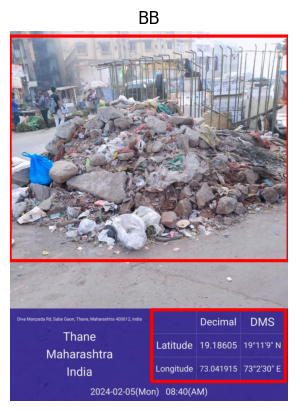

Dimensions: [(461, 248), (960, 777)]
<class 'str'>


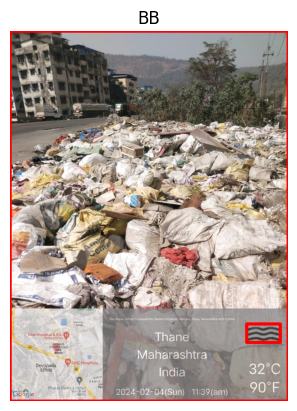

Dimensions: [(116, 64), (960, 1280)]
<class 'str'>


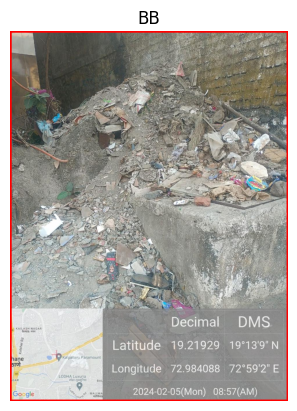

Dimensions: [(961, 1280)]
<class 'str'>


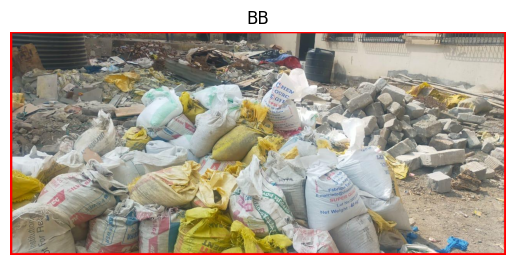

Dimensions: [(1280, 576)]
<class 'str'>


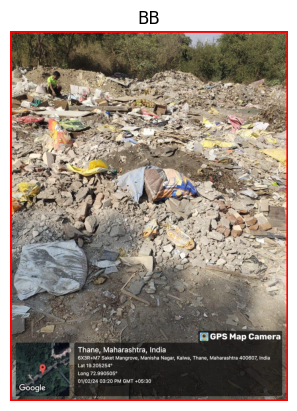

Dimensions: [(864, 1152)]
<class 'str'>


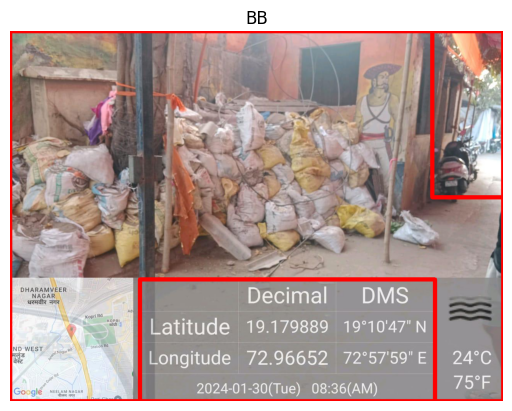

Dimensions: [(766, 316), (184, 431), (1280, 960)]
<class 'str'>


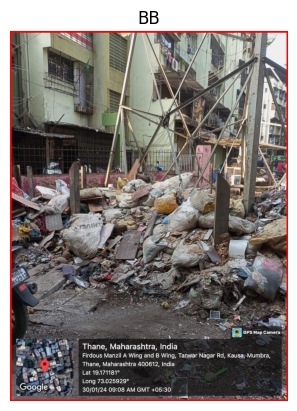

Dimensions: [(960, 1280)]
<class 'str'>


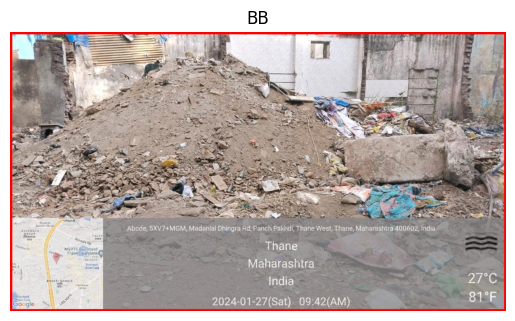

Dimensions: [(1280, 720)]
<class 'str'>


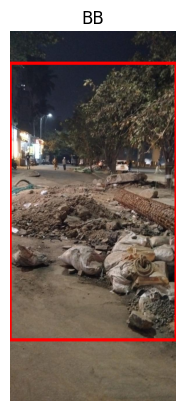

Dimensions: [(574, 957)]
<class 'str'>


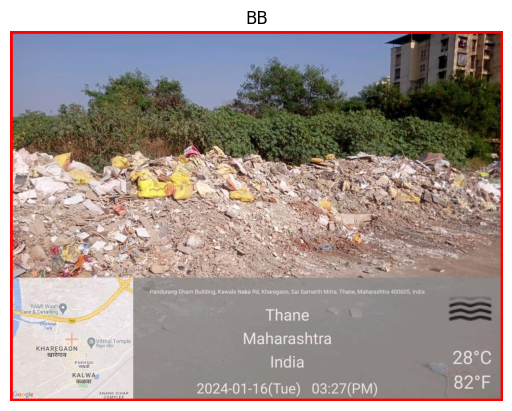

Dimensions: [(1040, 780)]
<class 'str'>


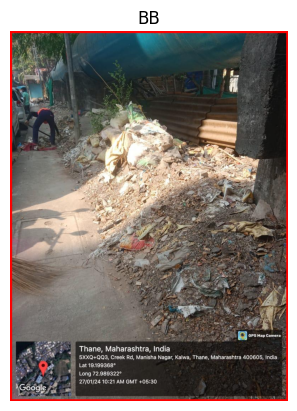

Dimensions: [(780, 1040)]
<class 'str'>


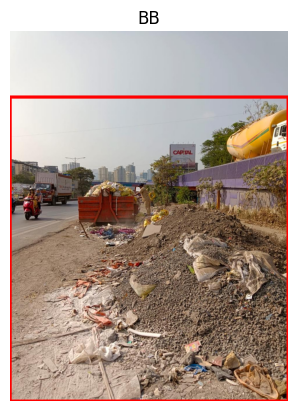

Dimensions: [(960, 1052)]
<class 'str'>


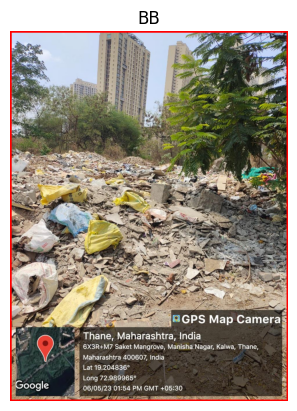

Dimensions: [(961, 1280)]
<class 'str'>


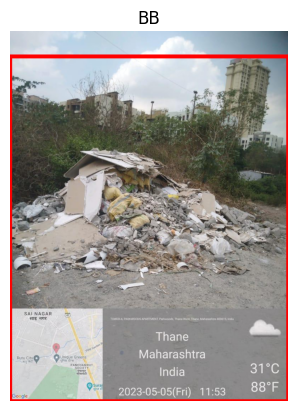

Dimensions: [(780, 969)]
<class 'str'>


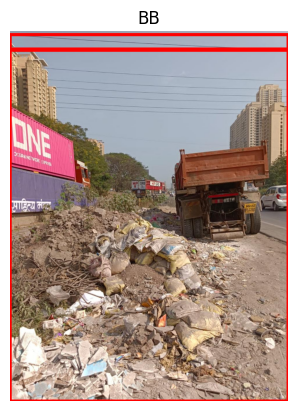

Dimensions: [(960, 1218), (960, 54)]
<class 'str'>


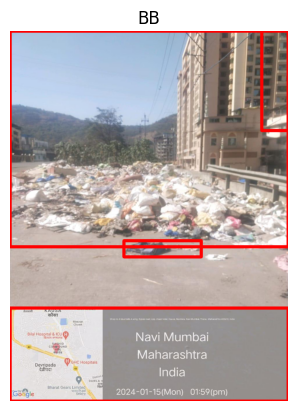

Dimensions: [(960, 322), (267, 56), (91, 344), (960, 746)]
<class 'str'>


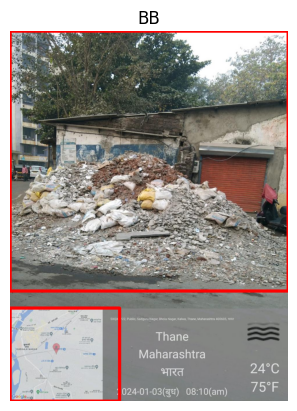

Dimensions: [(378, 322), (960, 899)]
<class 'str'>


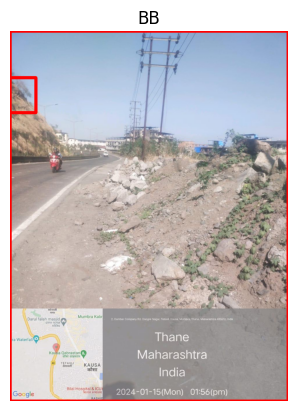

Dimensions: [(89, 121), (960, 1280)]
<class 'str'>


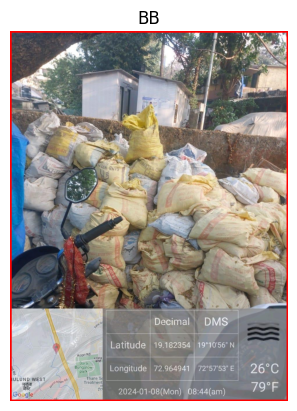

Dimensions: [(960, 1280)]
<class 'str'>


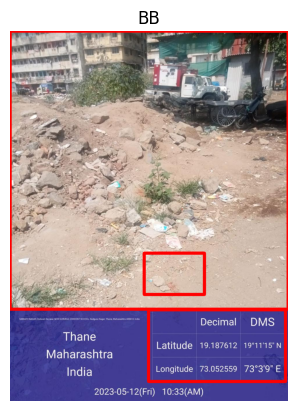

Dimensions: [(473, 248), (208, 143), (960, 962)]
<class 'str'>


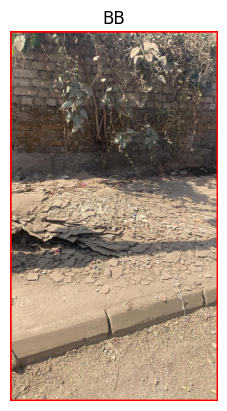

Dimensions: [(720, 1280)]
<class 'str'>


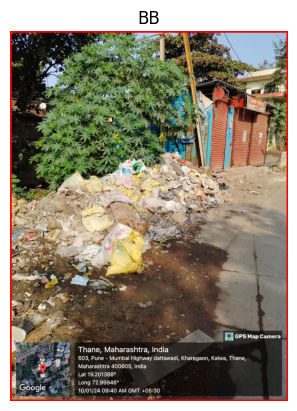

Dimensions: [(961, 1280)]
<class 'str'>


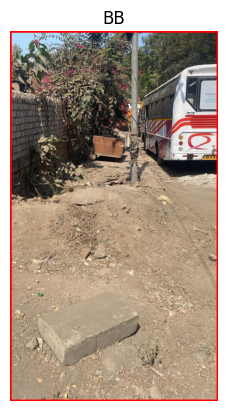

Dimensions: [(720, 1280)]
<class 'str'>


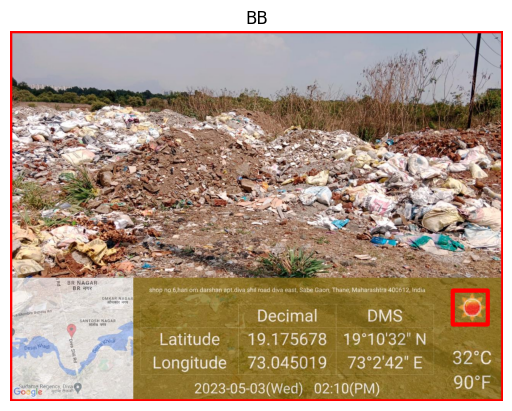

Dimensions: [(91, 88), (1280, 960)]


In [18]:

# Directory path
directory = 'train_images'

# Initialize an empty list to store file names
image_list = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    image_path = os.path.join(directory, filename)
    # Check if the file is a regular file (not a directory)
    if os.path.isfile(image_path):
        image_list.append(image_path)


for i in image_list:
    print(type(i))
    image=cv2.imread(i)
    # image=image.resize(256,256)
    # cv2.imshow(image)
    # cv2.waitKey(0)
    # get contours
    contours=filtered_contours(image)
    # draw bb on original images
    dimensions=[]
    image_copy=image.copy()
    for contour in contours:
        # Get bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)
        
        # Draw bounding box (optional)
        cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 0, 255), 10)
        
        # Calculate dimensions and add to list
        dimensions.append((w, h))

    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.title('BB')
    plt.axis('off')  # Hide the axis
    plt.show()

    print("Dimensions:", dimensions)
    